## Залежності проекту

In [293]:
import numpy as np
import pandas as pd

In [294]:
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

## Ознайомлення із набором даних

In [296]:
df = pd.read_csv('./real-estate-with-nn-results.csv')
df.head()

,Unnamed: 0,residence,developer,description,address,district,ceilingHeight,numApartmentsTotal,year,pricePerSquareMeter,price,area,rooms,floor,minutesToCityCenter,assess,crimeRateInDistrict,predictedClass
0,0,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,137800.0,7441200.0,54,1,18.0,48,52536,2317,бізнес
1,1,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,137800.0,7992400.0,58,1,NaN,48,52536,2317,бізнес
2,2,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,125275.0,10022000.0,80,2,7.0,48,52536,2317,бізнес
3,3,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,125275.0,10147275.0,81,2,13.0,48,52536,2317,бізнес
4,4,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,125275.0,10648375.0,85,2,17.0,48,52536,2317,бізнес


## Статистика

In [297]:
df.describe()

,Unnamed: 0,ceilingHeight,numApartmentsTotal,year,pricePerSquareMeter,price,area,rooms,floor,minutesToCityCenter,assess,crimeRateInDistrict
count,169.000000,169.000000,169.000000,169.000000,160.000000,1.600000e+02,169.000000,169.000000,161.000000,169.000000,169.000000,169.000000
mean,84.000000,2.443787,1731.479290,2023.393491,100752.812500,9.366031e+06,82.893491,1.852071,11.796273,91.414201,69152.650888,2720.017751
std,48.930222,0.498307,1624.999967,0.717896,69272.329403,1.257591e+07,53.039186,0.890765,6.920151,58.415538,38927.162889,600.219687
min,0.000000,2.000000,125.000000,2022.000000,34700.000000,1.232500e+06,8.000000,1.000000,2.000000,5.000000,34392.000000,2106.000000
25%,42.000000,2.000000,328.000000,2023.000000,58987.500000,3.264581e+06,53.000000,1.000000,7.000000,40.000000,47299.000000,2317.000000
50%,84.000000,2.000000,1709.000000,2023.000000,69725.000000,4.888850e+06,76.000000,2.000000,11.000000,109.000000,52536.000000,2537.000000
75%,126.000000,3.000000,2857.000000,2023.500000,116825.000000,9.024400e+06,98.000000,2.000000,14.000000,156.000000,53927.000000,2884.000000
max,168.000000,3.000000,5183.000000,2025.000000,317600.000000,7.940000e+07,556.000000,5.000000,25.500000,169.000000,136750.000000,3939.000000


In [298]:
df.shape

(169, 18)

In [299]:
df = df.dropna()

In [300]:
df.shape

(152, 18)

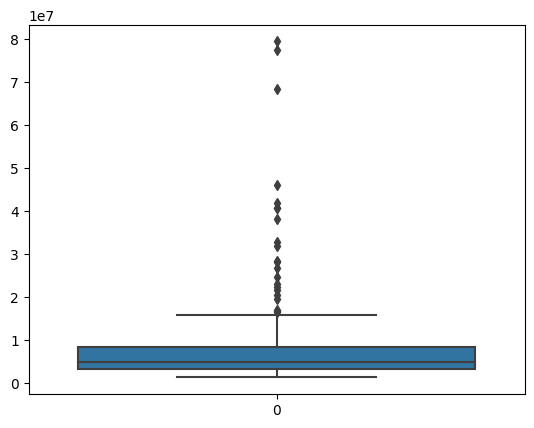

In [301]:
sns.boxplot(df['price'])
plt.show()

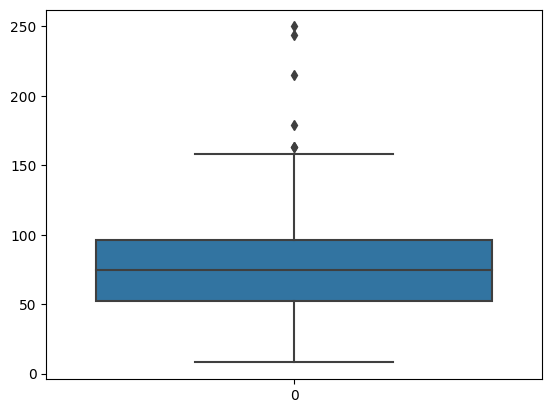

In [302]:
sns.boxplot(df['area'])
plt.show()

In [303]:
df['logprice']=np.log(df['price'])
df['logarea']=np.log(df['area'])


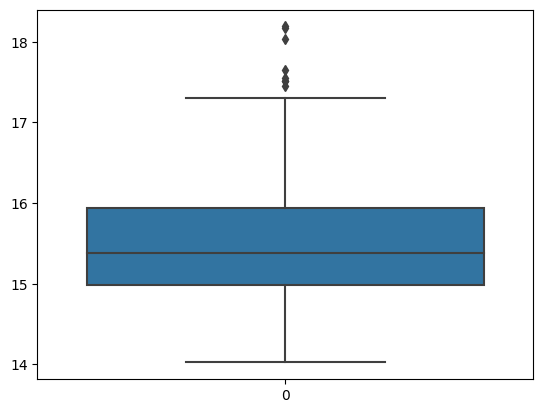

In [304]:
sns.boxplot(df['logprice'])
plt.show()

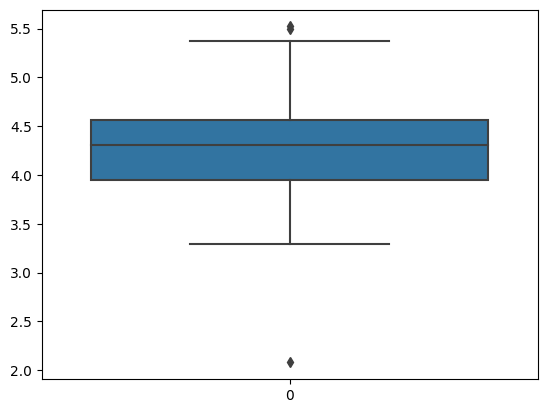

In [305]:
sns.boxplot(df['logarea'])
plt.show()

## Фільтрація набору даних від викидів

Викидами є дані що кардинально відрізняються від середніх значень що були знайдені в наборі даних.

In [306]:
q1_logprice = df['logprice'].quantile(0.25)
q3_logprice = df['logprice'].quantile(0.75)
iqr_logprice = q3_logprice - q1_logprice
lower_bound_logprice = q1_logprice - 1.5 * iqr_logprice
upper_bound_logprice = q3_logprice + 1.5 * iqr_logprice

outliers_logprice = df[(df['logprice'] < lower_bound_logprice) | (df['logprice'] > upper_bound_logprice)].index

print(outliers_logprice)


Int64Index([115, 116, 117, 118, 119, 120, 121, 122], dtype='int64')


In [307]:
q1_logarea = df['logarea'].quantile(0.25)
q3_logarea = df['logarea'].quantile(0.75)
iqr_logarea = q3_logarea - q1_logarea
lower_bound_logarea = q1_logarea - 1.5 * iqr_logarea
upper_bound_logarea = q3_logarea + 1.5 * iqr_logarea

outliers_logarea = df[(df['logarea'] < lower_bound_logarea) | (df['logarea'] > upper_bound_logarea)].index

print(outliers_logarea)

Int64Index([101, 121, 122], dtype='int64')


In [308]:
outliers = list(outliers_logprice.copy())
outliers.extend(list(outliers_logarea))

In [309]:
outliers

[115, 116, 117, 118, 119, 120, 121, 122, 101, 121, 122]

In [310]:
df1 = df.drop(outliers)
df1.shape

(143, 20)

## Обрахування значимості незалежних змінних на залежну змінну

OLS - Ordinary List Squares

In [311]:
lm_HPRICE = smf.ols(formula='price ~ area', data=df1).fit()
print(lm_HPRICE.params)
lm_HPRICE.summary()

Intercept   -2.142895e+06
area         1.245743e+05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     57.25
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.52e-12
Time:                        08:08:36   Log-Likelihood:                -2418.7
No. Observations:                 143   AIC:                             4841.
Df Residuals:                     141   BIC:                             4847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.143e+06   1.28e+06     -1.680      0.095   -4.66e+06    3.79e+05
area        1.246e+05   1.65e+04      7.567      0.000     9.2e+04    1.57e+05
==============================================================================
Omnibus:                       49.128   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.906
Skew:                           1.466   Prob(JB):                     1.36e-24
Kurtosis:                       6.139   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
lm_HPRICE1 = smf.ols(formula='logprice ~ area', data=df1).fit()
print(lm_HPRICE1.params)
lm_HPRICE1.summary()

Intercept    14.258963
area          0.016550
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     99.05
Date:                Tue, 16 May 2023   Prob (F-statistic):           5.29e-18
Time:                        08:08:36   Log-Likelihood:                -115.29
No. Observations:                 143   AIC:                             234.6
Df Residuals:                     141   BIC:                             240.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2590      0.129    110.669      0.000      14.004      14.514
area           0.0166      0.002      9.952      0.000       0.013       0.020
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                2.049
Skew:                           0.283   Prob(JB):                        0.359
Kurtosis:                       2.844   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
lm_HPRICE2 = smf.ols(formula='logprice ~ logarea', data=df1).fit()
print(lm_HPRICE2.params)
lm_HPRICE2.summary()

Intercept    10.324439
logarea       1.219768
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     120.3
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.28e-20
Time:                        08:08:36   Log-Likelihood:                -109.23
No. Observations:                 143   AIC:                             222.5
Df Residuals:                     141   BIC:                             228.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3244      0.470     21.959      0.000       9.395      11.254
logarea        1.2198      0.111     10.967      0.000       1.000       1.440
==============================================================================
Omnibus:                        3.583   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.633
Skew:                           0.370   Prob(JB):                        0.163
Kurtosis:                       2.748   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='logarea', ylabel='logprice'>

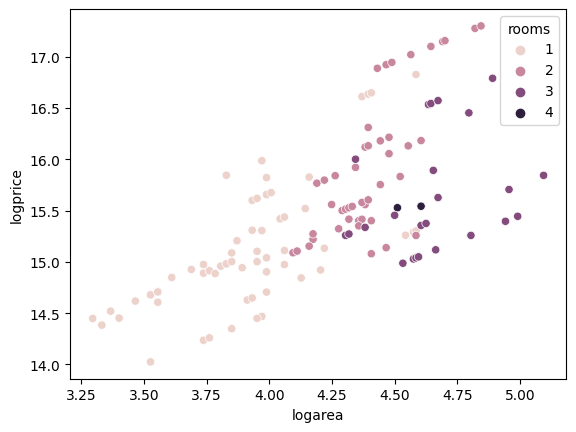

In [314]:
sns.scatterplot(data=df1, x='logarea', y='logprice', hue='rooms')

<AxesSubplot: xlabel='numApartmentsTotal', ylabel='logprice'>

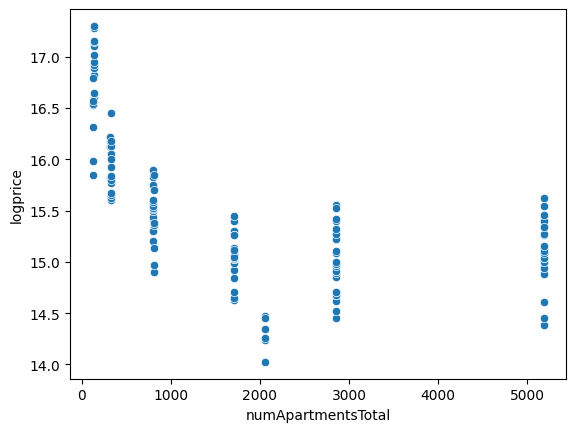

In [315]:
sns.scatterplot(data=df1, x='numApartmentsTotal', y='logprice')

<AxesSubplot: xlabel='ceilingHeight', ylabel='logprice'>

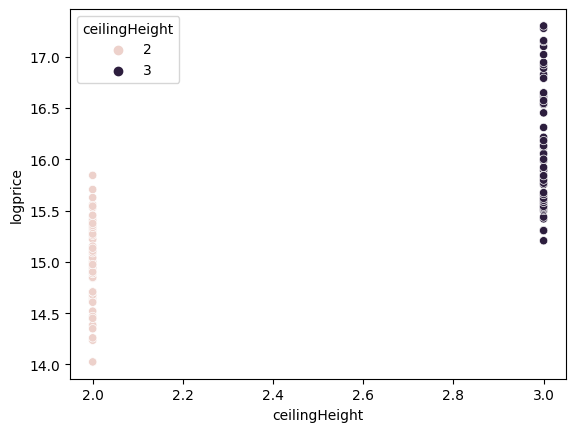

In [316]:
sns.scatterplot(data=df1, x='ceilingHeight', y='logprice', hue='ceilingHeight')

<AxesSubplot: xlabel='predictedClass', ylabel='logprice'>

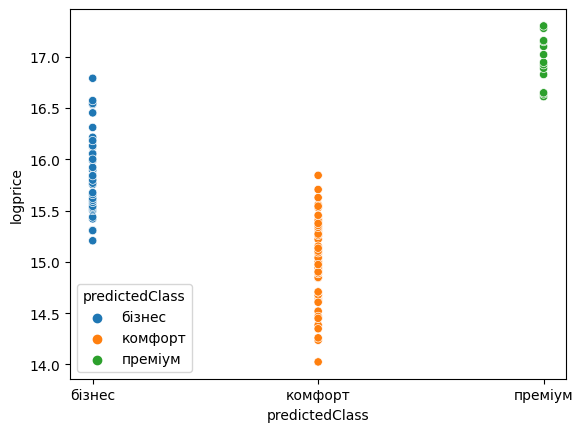

In [317]:
sns.scatterplot(data=df1, x='predictedClass', y='logprice', hue='predictedClass')

In [318]:
df1['predictedClass'] = df['predictedClass'].replace({'комфорт': 1, 'бізнес': 2, 'преміум': 3})


In [319]:
lm_HPRICE3 = smf.ols(formula='logprice ~ logarea + rooms', data=df1).fit()
print(lm_HPRICE3.params)
lm_HPRICE3.summary()

Intercept    8.946009
logarea      1.667886
rooms       -0.293863
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     72.09
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.00e-22
Time:                        08:08:37   Log-Likelihood:                -102.71
No. Observations:                 143   AIC:                             211.4
Df Residuals:                     140   BIC:                             220.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9460      0.588     15.223      0.000       7.784      10.108
logarea        1.6679      0.162     10.266      0.000       1.347       1.989
rooms         -0.2939      0.080     -3.656      0.000      -0.453      -0.135
==============================================================================
Omnibus:                        1.152   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                1.154
Skew:                           0.107   Prob(JB):                        0.562
Kurtosis:                       2.615   Cond. No.                         68.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
lm_HPRICE4 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight', data=df1).fit()
print(lm_HPRICE4.params)
lm_HPRICE4.summary()

Intercept        9.262770
logarea          1.021365
rooms           -0.081461
ceilingHeight    0.844487
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     181.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           7.85e-48
Time:                        08:08:37   Log-Likelihood:                -39.548
No. Observations:                 143   AIC:                             87.10
Df Residuals:                     139   BIC:                             98.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.2628      0.380     24.384      0.000       8.512      10.014
logarea           1.0214      0.114      8.921      0.000       0.795       1.248
rooms            -0.0815      0.054     -1.508      0.134      -0.188       0.025
ceilingHeight     0.8445      0.060     14.045      0.000       0.726       0.963
==============================================================================
Omnibus:                        2.623   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.649
Skew:                           0.295   Prob(JB):                        0.266
Kurtosis:                       2.688   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal', data=df1).fit()
print(lm_HPRICE5.params)
lm_HPRICE5.summary()

Intercept             8.330517
logarea               1.150543
rooms                -0.126173
ceilingHeight         0.985479
numApartmentsTotal    0.000067
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     143.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.29e-48
Time:                        08:08:37   Log-Likelihood:                -36.129
No. Observations:                 143   AIC:                             82.26
Df Residuals:                     138   BIC:                             97.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.3305      0.517     16.118      0.000       7.309       9.353
logarea                1.1505      0.123      9.377      0.000       0.908       1.393
rooms                 -0.1262      0.056     -2.267      0.025      -0.236      -0.016
ceilingHeight          0.9855      0.080     12.306      0.000       0.827       1.144
numApartmentsTotal  6.699e-05   2.58e-05      2.600      0.010     1.6e-05       0.000
==============================================================================
Omnibus:                        3.275   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.285
Skew:                           0.361   Prob(JB):                        0.193
Kurtosis:                       2.830   Cond. No.                     5.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [322]:
lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal', data=df1).fit()
print(lm_HPRICE5.params)
lm_HPRICE5.summary()

Intercept             8.330517
logarea               1.150543
rooms                -0.126173
ceilingHeight         0.985479
numApartmentsTotal    0.000067
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     143.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.29e-48
Time:                        08:08:37   Log-Likelihood:                -36.129
No. Observations:                 143   AIC:                             82.26
Df Residuals:                     138   BIC:                             97.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.3305      0.517     16.118      0.000       7.309       9.353
logarea                1.1505      0.123      9.377      0.000       0.908       1.393
rooms                 -0.1262      0.056     -2.267      0.025      -0.236      -0.016
ceilingHeight          0.9855      0.080     12.306      0.000       0.827       1.144
numApartmentsTotal  6.699e-05   2.58e-05      2.600      0.010     1.6e-05       0.000
==============================================================================
Omnibus:                        3.275   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.285
Skew:                           0.361   Prob(JB):                        0.193
Kurtosis:                       2.830   Cond. No.                     5.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [323]:
lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor', data=df1).fit()
print(lm_HPRICE5.params)
lm_HPRICE5.summary()

Intercept             8.575261
logarea               1.130015
rooms                -0.123747
ceilingHeight         0.944761
numApartmentsTotal    0.000058
floor                -0.004146
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.78e-47
Time:                        08:08:37   Log-Likelihood:                -35.737
No. Observations:                 143   AIC:                             83.47
Df Residuals:                     137   BIC:                             101.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5753      0.589     14.554      0.000       7.410       9.740
logarea                1.1300      0.125      9.035      0.000       0.883       1.377
rooms                 -0.1237      0.056     -2.218      0.028      -0.234      -0.013
ceilingHeight          0.9448      0.093     10.173      0.000       0.761       1.128
numApartmentsTotal  5.818e-05   2.77e-05      2.099      0.038    3.37e-06       0.000
floor                 -0.0041      0.005     -0.868      0.387      -0.014       0.005
==============================================================================
Omnibus:                        3.564   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.603
Skew:                           0.375   Prob(JB):                        0.165
Kurtosis:                       2.793   Cond. No.                     5.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
lm_HPRICE6 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor + crimeRateInDistrict', data=df1).fit()
print(lm_HPRICE6.params)
lm_HPRICE6.summary()

Intercept              9.404546
logarea                1.428241
rooms                 -0.182380
ceilingHeight          0.543581
numApartmentsTotal     0.000010
floor                 -0.008356
crimeRateInDistrict   -0.000319
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     120.5
Date:                Tue, 16 May 2023   Prob (F-statistic):           6.50e-52
Time:                        08:08:37   Log-Likelihood:                -21.568
No. Observations:                 143   AIC:                             57.14
Df Residuals:                     136   BIC:                             77.88
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.4045      0.557     16.894      0.000       8.304      10.505
logarea                 1.4282      0.126     11.324      0.000       1.179       1.678
rooms                  -0.1824      0.052     -3.519      0.001      -0.285      -0.080
ceilingHeight           0.5436      0.112      4.857      0.000       0.322       0.765
numApartmentsTotal   1.035e-05   2.67e-05      0.388      0.699   -4.24e-05    6.31e-05
floor                  -0.0084      0.004     -1.895      0.060      -0.017       0.000
crimeRateInDistrict    -0.0003   5.83e-05     -5.460      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        3.775   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.452
Skew:                           0.252   Prob(JB):                        0.178
Kurtosis:                       3.570   Cond. No.                     8.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [325]:
lm_HPRICE7 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor + crimeRateInDistrict + predictedClass', data=df1).fit()
print(lm_HPRICE7.params)
lm_HPRICE7.summary()

Intercept              11.426629
logarea                 1.001315
rooms                  -0.020851
ceilingHeight          -0.328257
numApartmentsTotal      0.000017
floor                  -0.001812
crimeRateInDistrict    -0.000244
predictedClass          0.868260
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.04e-74
Time:                        08:08:37   Log-Likelihood:                 36.882
No. Observations:                 143   AIC:                            -57.76
Df Residuals:                     135   BIC:                            -34.06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.4266      0.402     28.407      0.000      10.631      12.222
logarea                 1.0013      0.090     11.096      0.000       0.823       1.180
rooms                  -0.0209      0.037     -0.568      0.571      -0.093       0.052
ceilingHeight          -0.3283      0.100     -3.279      0.001      -0.526      -0.130
numApartmentsTotal   1.699e-05   1.78e-05      0.954      0.342   -1.82e-05    5.22e-05
floor                  -0.0018      0.003     -0.607      0.545      -0.008       0.004
crimeRateInDistrict    -0.0002   3.93e-05     -6.198      0.000      -0.000      -0.000
predictedClass          0.8683      0.066     13.067      0.000       0.737       1.000
==============================================================================
Omnibus:                       30.116   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.766
Skew:                          -1.091   Prob(JB):                     1.90e-10
Kurtosis:                       4.660   Cond. No.                     9.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
lm_HPRICE8 = smf.ols(formula='logprice ~ logarea + predictedClass', data=df1).fit()
print(lm_HPRICE8.params)
lm_HPRICE8.summary()

Intercept         11.085433
logarea            0.766392
predictedClass     0.762986
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     627.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.32e-70
Time:                        08:08:37   Log-Likelihood:                 11.022
No. Observations:                 143   AIC:                            -16.04
Df Residuals:                     140   BIC:                            -7.156
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.0854      0.206     53.860      0.000      10.679      11.492
logarea            0.7664      0.052     14.878      0.000       0.665       0.868
predictedClass     0.7630      0.031     24.750      0.000       0.702       0.824
==============================================================================
Omnibus:                       12.939   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.662
Skew:                          -0.523   Prob(JB):                      0.00798
Kurtosis:                       2.275   Cond. No.                         51.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Зміна підходу при побудові моделі лінійної регресії

In [327]:
X = df1[['area', 'rooms', 'crimeRateInDistrict', 'predictedClass', 'minutesToCityCenter']]
Y = df1[['price']]

lm_HPRICE9 = sm.OLS(Y, X).fit()
print(lm_HPRICE9.params)
lm_HPRICE9.summary()

area                   1.354991e+05
rooms                 -1.690367e+06
crimeRateInDistrict   -2.893547e+03
predictedClass         5.170302e+06
minutesToCityCenter    3.160997e+03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              251.3
Date:                Tue, 16 May 2023   Prob (F-statistic):                    1.85e-67
Time:                        08:08:37   Log-Likelihood:                         -2333.1
No. Observations:                 143   AIC:                                      4676.
Df Residuals:                     138   BIC:                                      4691.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
area                 1.355e+05   1.92e+04      7.070      0.000    9.76e+04    1.73e+05
rooms                -1.69e+06   5.47e+05     -3.089      0.002   -2.77e+06   -6.08e+05
crimeRateInDistrict -2893.5472    443.536     -6.524      0.000   -3770.553   -2016.542
predictedClass        5.17e+06   3.92e+05     13.200      0.000     4.4e+06    5.94e+06
minutesToCityCenter  3160.9975   6003.228      0.527      0.599   -8709.206     1.5e+04
==============================================================================
Omnibus:                       30.316   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.746
Skew:                           1.030   Prob(JB):                     1.58e-11
Kurtosis:                       5.026   Cond. No.                     6.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Найменша кількість незалежних змінних

In [328]:
lm_HPRICE10 = smf.ols(formula='logprice ~ logarea + rooms + crimeRateInDistrict + predictedClass + minutesToCityCenter', data=df1).fit()
print(lm_HPRICE10.params)
lm_HPRICE10.summary()

Intercept              9.479329
logarea                1.062591
rooms                 -0.044190
crimeRateInDistrict   -0.000166
predictedClass         1.036363
minutesToCityCenter    0.004962
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     436.1
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.90e-82
Time:                        08:08:37   Log-Likelihood:                 48.896
No. Observations:                 143   AIC:                            -85.79
Df Residuals:                     137   BIC:                            -68.02
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.4793      0.314     30.229      0.000       8.859      10.099
logarea                 1.0626      0.081     13.044      0.000       0.902       1.224
rooms                  -0.0442      0.033     -1.351      0.179      -0.109       0.020
crimeRateInDistrict    -0.0002   3.32e-05     -5.013      0.000      -0.000      -0.000
predictedClass          1.0364      0.065     15.956      0.000       0.908       1.165
minutesToCityCenter     0.0050      0.001      7.134      0.000       0.004       0.006
==============================================================================
Omnibus:                        1.821   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.381
Skew:                          -0.137   Prob(JB):                        0.501
Kurtosis:                       3.396   Cond. No.                     6.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Прогнозування вартості нерухомості

In [329]:
real_estate = df1.sample()[['logarea', 'rooms', 'ceilingHeight', 'numApartmentsTotal', 'floor', 'crimeRateInDistrict', 'predictedClass']]

In [330]:
real_estate

,logarea,rooms,ceilingHeight,numApartmentsTotal,floor,crimeRateInDistrict,predictedClass
83,3.871201,1,3,800,7.0,2537,2


In [331]:
real_estate_info = df1.loc[df1.index == real_estate.index.values[0]][['residence', 'address', 'predictedClass']].values[0]

In [332]:
real_estate_info

array(['ЖК Greenville на Печерську', 'пров. Новопечерський, 5', 2],
      dtype=object)

In [333]:
logprice_predicted = lm_HPRICE7.predict(real_estate).values[0]

In [334]:
import math

Зворотня операція до log - exp

In [335]:
predicted_price = math.exp(logprice_predicted)
price_formatted = "{:,}".format(round(predicted_price))

In [336]:
f"Ціна квартири в {real_estate_info[0]} за адресою {real_estate_info[1]} із класом житла {real_estate_info[2]} оцінена в {price_formatted} гривень"

'Ціна квартири в ЖК Greenville на Печерську за адресою пров. Новопечерський, 5 із класом житла 2 оцінена в 4,957,032 гривень'

## Прогнозування вартості нерухомості з урахуванням дальності до центру

In [337]:
real_estate = df1.sample()[['logarea', 'rooms', 'crimeRateInDistrict', 'predictedClass', 'minutesToCityCenter']]

In [338]:
real_estate

,logarea,rooms,crimeRateInDistrict,predictedClass,minutesToCityCenter
159,3.7612,1,2317,1,109


#### Зміна minutesToCityCenter

In [357]:
real_estate['minutesToCityCenter'] = 10

In [358]:
real_estate.index.values[0]

159

In [359]:
real_estate_info = df1.loc[df1.index == real_estate.index.values[0]][['residence', 'address', 'predictedClass', 'price']].values[0]

In [360]:
real_estate_info

array(['ЖК 4 сезони', 'вул. Михайла Максимовича (Трутенка), 3г', 1,
       1558750.0], dtype=object)

In [361]:
logprice_predicted = lm_HPRICE10.predict(real_estate).values[0]

In [362]:
import math

Зворотня операція до log - exp

In [363]:
predicted_price = math.exp(logprice_predicted)
price_formatted = "{:,}".format(round(predicted_price))

In [364]:
f"Ціна квартири в {real_estate_info[0]} за адресою {real_estate_info[1]} із класом житла {real_estate_info[2]} оцінена в {price_formatted} гривень"

'Ціна квартири в ЖК 4 сезони за адресою вул. Михайла Максимовича (Трутенка), 3г із класом житла 1 оцінена в 1,372,828 гривень'

## Експорт моделі для подальшого використання на сервері

In [347]:
# lm_HPRICE7.save("lm_HPRICE7.pickle")

In [348]:
# lm_HPRICE10.save("lm_HPRICE10.pickle")

Довільний приклад для тестування моделі